## Import EDA Tools and Data

In [3]:
# EDA Tools
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
plt.style.use('default')
import seaborn as sns 

In [2]:
data = pd.read_csv("audi.csv")
data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


## Getting Insights of Data (Visualization)

In [3]:
# Finding the Missing values in Data 
data.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [4]:
data.describe

<bound method NDFrame.describe of       model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0        A1  2017  12500       Manual    15735   Petrol  150  55.4         1.4
1        A6  2016  16500    Automatic    36203   Diesel   20  64.2         2.0
2        A1  2016  11000       Manual    29946   Petrol   30  55.4         1.4
3        A4  2017  16800    Automatic    25952   Diesel  145  67.3         2.0
4        A3  2019  17300       Manual     1998   Petrol  145  49.6         1.0
...     ...   ...    ...          ...      ...      ...  ...   ...         ...
10663    A3  2020  16999       Manual     4018   Petrol  145  49.6         1.0
10664    A3  2020  16999       Manual     1978   Petrol  150  49.6         1.0
10665    A3  2020  17199       Manual      609   Petrol  150  49.6         1.0
10666    Q3  2017  19499    Automatic     8646   Petrol  150  47.9         1.4
10667    Q3  2016  15999       Manual    11855   Petrol  150  47.9         1.4

[10668 rows x 9 c

In [5]:
# Checking the columns of the data
data.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [6]:
# Check how many categories are present in model column
# A3 tops
data['model'].value_counts()

 A3     1929
 Q3     1417
 A4     1381
 A1     1347
 A5      882
 Q5      877
 Q2      822
 A6      748
 Q7      397
 TT      336
 A7      122
 A8      118
 Q8       69
 RS6      39
 RS3      33
 RS4      31
 RS5      29
 R8       28
 S3       18
 SQ5      16
 S4       12
 SQ7       8
 S8        4
 S5        3
 A2        1
 RS7       1
Name: model, dtype: int64

In [7]:
# Correlation Matrix 
corr_matrix = data.corr()
corr_matrix

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.592581,-0.789667,0.093066,-0.351281,-0.031582
price,0.592581,1.000000,-0.535357,0.356157,-0.600334,0.591262
mileage,-0.789667,-0.535357,1.000000,-0.166547,0.395103,0.070710
tax,0.093066,0.356157,-0.166547,1.000000,-0.635909,0.393075
mpg,-0.351281,-0.600334,0.395103,-0.635909,1.000000,-0.365621
engineSize,-0.031582,0.591262,0.070710,0.393075,-0.365621,1.000000


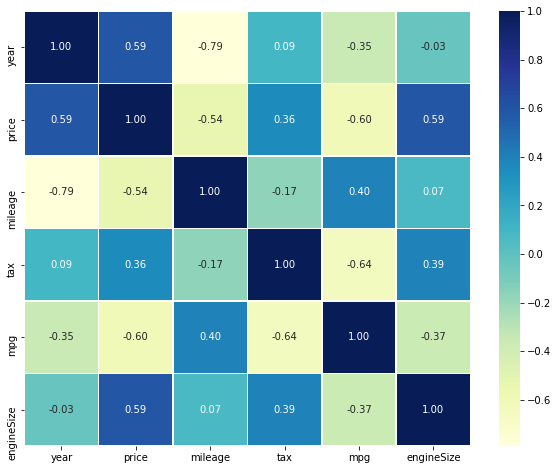

In [8]:
# Visualizing the Correlation Matrix 
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix , annot=True , linewidths=0.5 , fmt='.2f' , cmap="YlGnBu");

In [9]:
data['transmission'].value_counts()

Manual       4369
Semi-Auto    3591
Automatic    2708
Name: transmission, dtype: int64

In [10]:
data['fuelType'].value_counts()

Diesel    5577
Petrol    5063
Hybrid      28
Name: fuelType, dtype: int64

<AxesSubplot:xlabel='transmission', ylabel='price'>

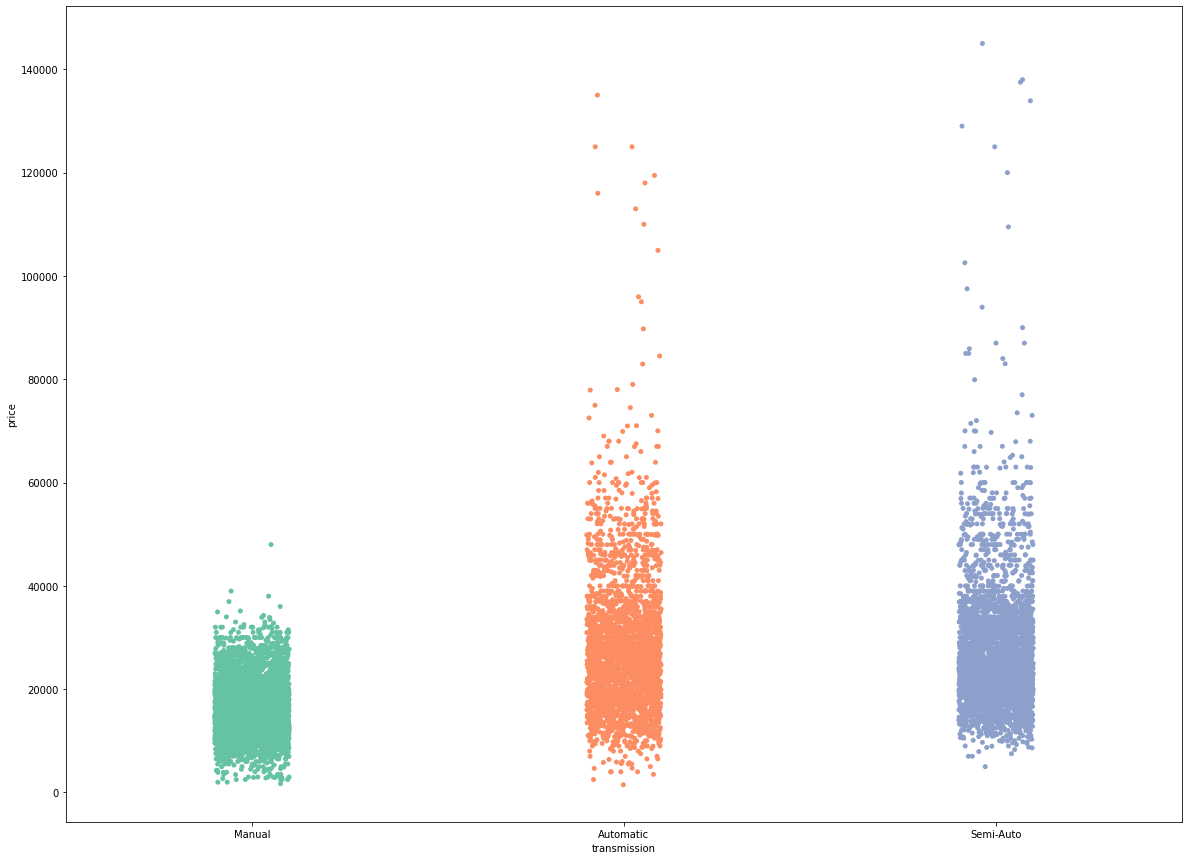

In [11]:
plt.figure(figsize = (20,15))
sns.stripplot(x="transmission", y="price", data=data , jitter=True , palette='Set2')

## Preprocessing the data 

In [12]:
# All the categorical columns in data 
cat_cols = ['model', 'transmission', 'fuelType']

In [13]:
# So, here we will Encode the Categorical values to numerical values.
from sklearn.preprocessing import OneHotEncoder

OHE = OneHotEncoder(handle_unknown = 'ignore', sparse = False)
data_OHE = pd.DataFrame(OHE.fit_transform(data[cat_cols]))
data_OHE.index = data.index
data_num = data.drop(cat_cols, axis=1)
data_OHE_concat = pd.concat([data_num, data_OHE], axis=1)

In [14]:
# here all of the categorical data is convered into numerical 
data_OHE_concat.head()

,year,price,mileage,tax,mpg,engineSize,0,1,2,3,...,22,23,24,25,26,27,28,29,30,31
0,2017,12500,15735,150,55.4,1.4,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2016,16500,36203,20,64.2,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,2016,11000,29946,30,55.4,1.4,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,2017,16800,25952,145,67.3,2.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,2019,17300,1998,145,49.6,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [15]:
data.shape  , data_OHE.shape , data_OHE_concat.shape

((10668, 9), (10668, 32), (10668, 38))

## Building a Machine Learning Model

In [16]:
# Spliting The dataset
from sklearn.model_selection import train_test_split

#Setup Random seed
np.random.seed(42)

# Assign the X and Y 
X = data_OHE_concat.drop('price' , axis=1)
y = data['price']

# Split 
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2)

In [17]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((8534, 37), (2134, 37), (8534,), (2134,))

## Time to Evalutate the best model for the Dataset

Best Article for understanding Mae , Mse , R^2 etc :- https://www.studytonight.com/post/what-is-mean-squared-error-mean-absolute-error-root-mean-squared-error-and-r-squared

In [18]:
# Here we are going to create the Dictinary for the Result of Models
Model_Performances = {}

In [19]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score 

def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [20]:
# Here we will Import and Use RandomForestRegressor

from sklearn.metrics import r2_score , mean_absolute_error # here i am using R^2 and Mae for better results
from sklearn.ensemble import RandomForestRegressor

# Now Make Predictions
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train , y_train)
rf_pred = rf.predict(X_test)          
rf_mae = mean_absolute_error(rf_pred , y_test)
rf_r2 = r2_score(rf_pred , y_test)
rf_score = rf.score(X_test , y_test)
Model_Performances["RandomForestRegressor"] = rf_score
print(f"Score of R^2: {rf_r2}")
print(f"Score of Mean absoulte error: {rf_mae}")
print(f"Score of RandomForestRegressor: {rf_score *100:2f}%")

Score of R^2: 0.9627060695061118
Score of Mean absoulte error: 1529.1542326597437
Score of RandomForestRegressor: 96.436031%


In [21]:
# Here we will Import and Use Linear Regression 
from sklearn.linear_model import LinearRegression

# Now Make Predictions
lr = LinearRegression()
lr.fit(X_train , y_train)
lr_pred = lr.predict(X_test)
lr_mae = mean_absolute_error(lr_pred , y_test)
lr_r2 = r2_score(lr_pred , y_test)
lr_score = lr.score(X_test , y_test)
Model_Performances["Linear Regresion"] = lr_score
print(f"Score of R^2 DecisionTreeRegressor: {lr_r2}")
print(f"Score of mean absolute error Linear Regression: {lr_mae}")
print(f"Score of Linear Regression: {lr_score *100:2f}%")

Score of R^2 DecisionTreeRegressor: 0.8778244677661962
Score of mean absolute error Linear Regression: 2633.0870377739348
Score of Linear Regression: 89.604462%


In [22]:
# Here we will Import and Use Decision Tree Regressor 
from sklearn.tree import DecisionTreeRegressor

# Now Make Predictions
dt = DecisionTreeRegressor(max_leaf_nodes = 900 , random_state = 42)
dt.fit(X_train , y_train)
dt_pred = dt.predict(X_test)
dt_mae = mean_absolute_error(dt_pred , y_test)
dt_r2 = r2_score(dt_pred , y_test)
dt_score = dt.score(X_test , y_test)
Model_Performances["Decision Tree Regressor"] = dt_score
print(f"Score of R^2 DecisionTreeRegressor: {dt_r2}")
print(f"Score of mean absolute error DecisionTreeRegressor: {dt_mae}")
print(f"Score of DecisionTreeRegressor: {dt_score *100:2f}%")

Score of R^2 DecisionTreeRegressor: 0.9447969875529121
Score of mean absolute error DecisionTreeRegressor: 1783.701821683378
Score of DecisionTreeRegressor: 94.508349%


In [23]:
# We will now check the best Score from above 
Model_Performances

{'RandomForestRegressor': 0.9643603121020543,
 'Linear Regresion': 0.8960446237229938,
 'Decision Tree Regressor': 0.9450834944774577}

In [24]:
compareModels = pd.DataFrame.from_dict(Model_Performances , orient='index' , columns=['Accuracy'])
compareModels

,Accuracy
RandomForestRegressor,0.964360
Linear Regresion,0.896045
Decision Tree Regressor,0.945083


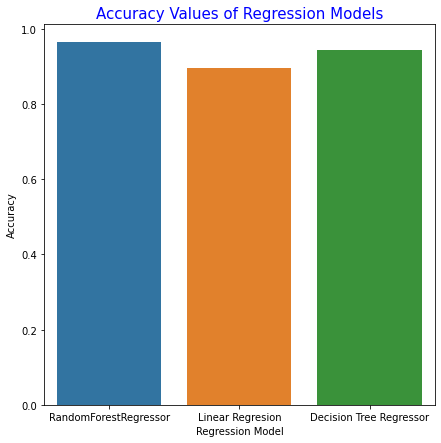

In [25]:
# Let's Visualize them
plt.figure(figsize= (7,7))
sns.barplot(x = compareModels.index , y = compareModels.Accuracy)
plt.ylabel("Accuracy")
plt.xlabel('Regression Model')
plt.title('Accuracy Values of Regression Models' , color = 'blue' , fontsize = 15)
plt.show();

# Saving the model

In [26]:
# Let's save the best model
import pickle 
pickle.dump(rf, open("random_forest_regressor_model.pkl", "wb"))

In [27]:
# Let's Load the saved model
loaded_pickle_model = pickle.load(open("random_forest_regressor_model.pkl", "rb"))

In [28]:
loaded_pickle_model

RandomForestRegressor()